Import all basic libraries required

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sea 

Import the dataset  and place the data and target in x and y respectively

In [1]:
from sklearn.datasets import fetch_openml
data=fetch_openml('mnist_784')
x=data.data
y=data.target
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will try to plot some of the images.

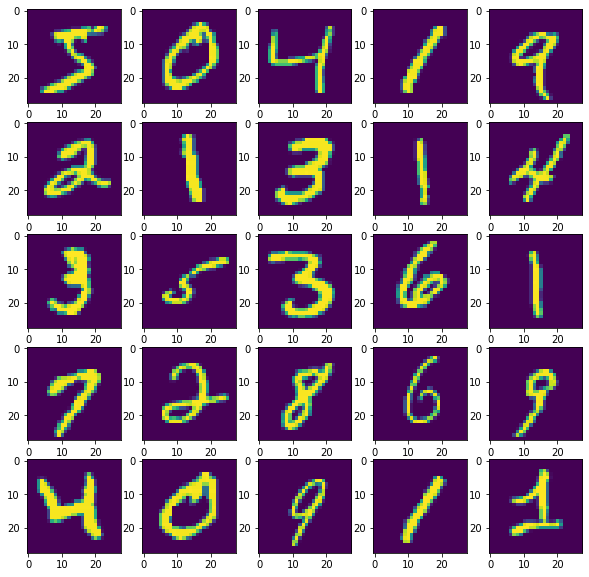

In [4]:
plt.figure(figsize=(10,10))
for i in range(0,25):
  plt.subplot(5,5,i+1)
  var1=np.array(x.iloc[i]).reshape(28,28)
  plt.imshow(var1)
plt.show()  

# Introduce PCA and StandardScaler for further processing 

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Try to scale down the data in x to standard scaler because to implement PCA standardscaling is must 

In [7]:
std=StandardScaler()
pca=PCA()
var1=std.fit_transform(x)
x_std=pd.DataFrame(var1,columns=x.columns)
x_std.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0


# Now we will fit the scaled data to PCA for extracting features which have Zero collenierity among them  

In [ ]:
x_pca=pca.fit(x_std)

In [ ]:
x_pca_sum=x_pca.explained_variance_ratio_

In [ ]:
x_pca_cumsum=x_pca.explained_variance_ratio_.cumsum()

In [ ]:
len(x_pca_sum)

784

In [ ]:
index=np.arange(len(x_pca_sum))

# We will then plot the cummutative sum of all the PCA and gain insight that 331 columns are enough to to summarize variance upto 95 percent

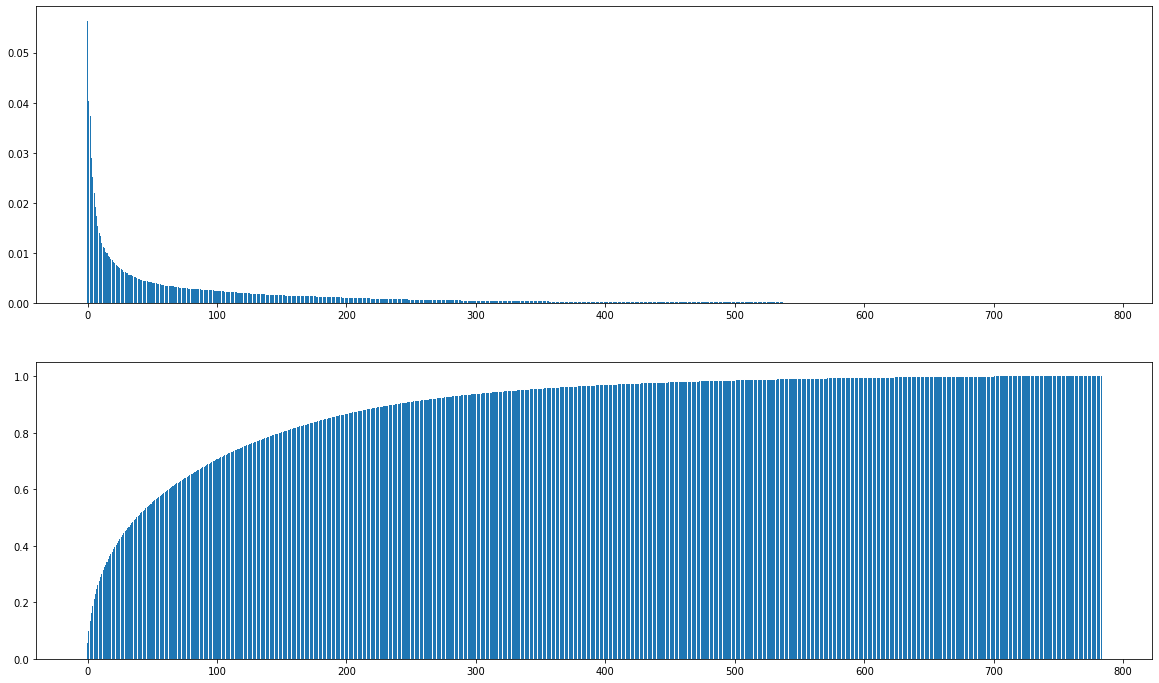

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.bar(index,x_pca_sum)
plt.subplot(212)
plt.bar(index,x_pca_cumsum)
plt.show()

In [ ]:
var1=len(x_pca_cumsum[x_pca_cumsum<0.95])

In [ ]:
var1

331

# finally we will use fit_transform on 331 columns 

In [ ]:
pca=PCA(n_components=var1)

In [ ]:
x_final=pca.fit_transform(x_std)

In [ ]:
x_final.shape

(70000, 331)

# we will use train test split and put 1-4th of the whole data as test 

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x_final,y,random_state=0,test_size=0.25)

# We will use decision tree algorithms and the accuracy comes to be 81 percent 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score 

In [ ]:
accuracy_score(y_test,y_pred)

0.8144

# Once we complete the whole model regarding PCA ,we will know focus on LDA for the model creation 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda=LinearDiscriminantAnalysis()

In [ ]:
var2=lda.fit(x_std,y)

In [ ]:
var2_sum=var2.explained_variance_ratio_
var2_cumsum=var2.explained_variance_ratio_.cumsum()

In [ ]:
len(var2_sum)

9

# The LDA is good with the classification problem as it helps us in both the significancy and multicollinearity in the data so we have to consider both x and y both (both data and target )

In [ ]:
var2_sum

array([0.23718291, 0.20346642, 0.17734666, 0.10702753, 0.0944031 ,
       0.06907143, 0.05012934, 0.03446957, 0.02690304])

In [ ]:
var2_cumsum

array([0.23718291, 0.44064934, 0.617996  , 0.72502353, 0.81942663,
       0.88849806, 0.93862739, 0.97309696, 1.        ])

In [ ]:
index=np.arange(len(var2_sum))

In [ ]:
index

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

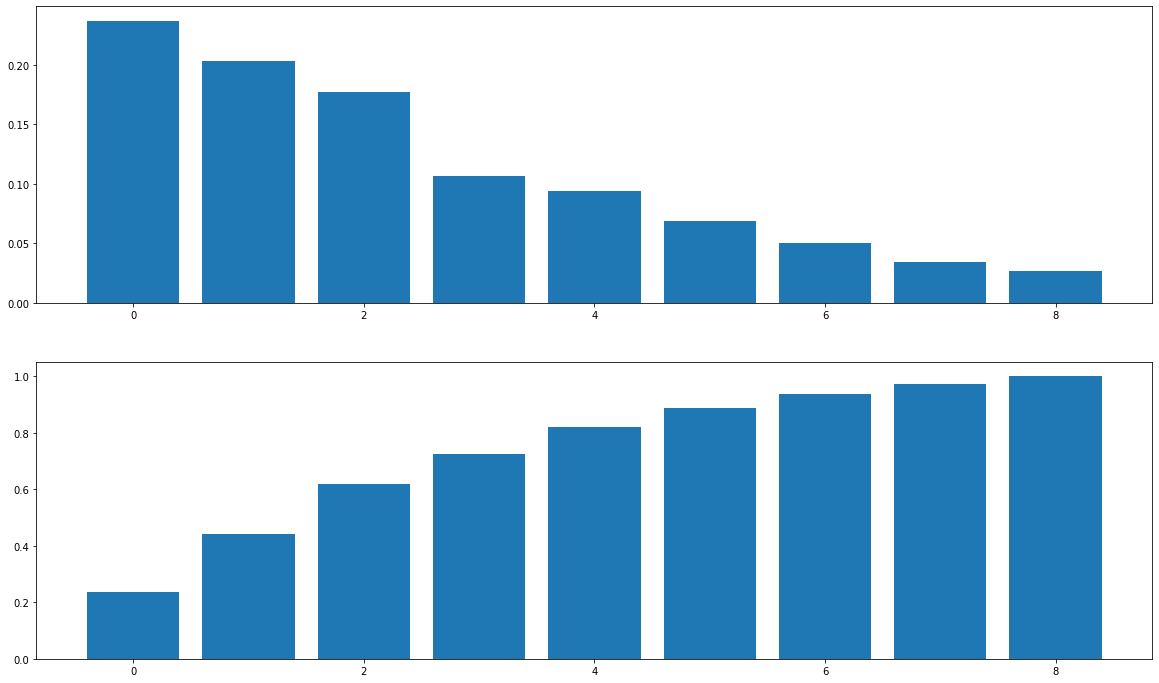

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.bar(index,var2_sum)
plt.subplot(212)
plt.bar(index,var2_cumsum)
plt.show()

In [ ]:
var3=len(var2_cumsum[var2_cumsum<0.95])

In [ ]:
var3

7

In [ ]:
lda=LinearDiscriminantAnalysis(n_components=var3)

In [ ]:
x_final_dataset=lda.fit_transform(np.array(x_std),np.array(y))

In [ ]:
x_final_dataset.shape

(70000, 7)

In [ ]:
x_final_dataset

array([[-0.9815313 , -0.60674231, -1.65255425, ...,  0.68747873,
         3.91396403,  0.73096093],
       [-3.05892432, -3.05284985, -2.88173559, ..., -3.11308878,
        -0.51065709,  0.43035835],
       [ 1.85791007, -0.05752316,  1.11624349, ...,  0.97548599,
        -1.55047915,  2.04871221],
       ...,
       [ 3.12523695, -0.84419027,  2.06665897, ...,  1.17979657,
        -0.4529487 , -0.06651955],
       [-0.92950977,  0.79599839, -1.4049491 , ...,  2.01650085,
         1.70975004, -2.09722096],
       [-3.78310457, -1.7814597 ,  6.61480248, ..., -0.96750612,
         2.57707759,  0.67214626]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_final_dataset,y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# With the use of LDA as feature engineering technique we are getting accuracy score as 83 percent

In [ ]:
accuracy_score(y_test,y_pred)

0.8370857142857143